# Tutorial

Followed along from https://networkx.org/documentation/stable/tutorial.html

## Creating a graph

Create an empty graph with no nodes and no edges.

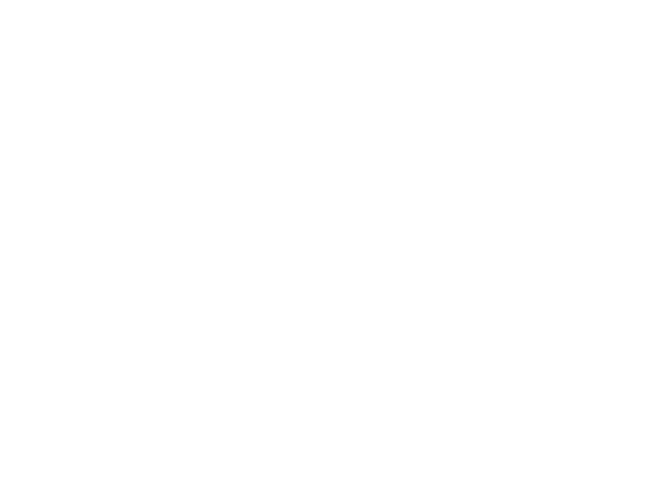

In [7]:
import networkx as nx
G = nx.Graph()
nx.draw(G)

By definition, a `Graph` is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

> Note: Pythons `None` object is not allowed to be used as a node. It determines whether optional function arguments have been assigned in many functions.

---

## Nodes

The graph `G` can be grown in several ways. NetworkX includes mnay graph generator functions and facilities to read and write graphs in many formats. To get started though, we'll look at simple manipulations. You can add one node at a time,

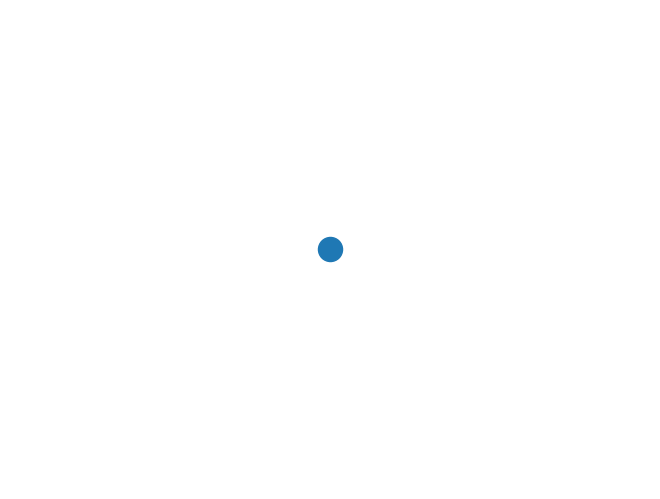

In [8]:
G.add_node(1)
nx.draw(G)

or add nodes from any iterable container, such as a list

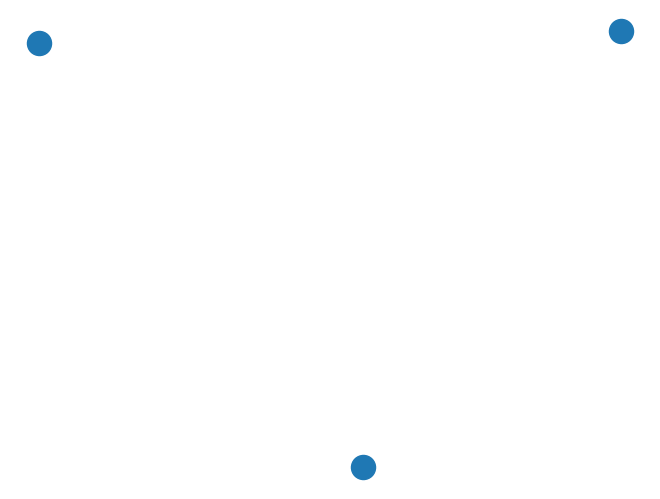

In [9]:
G.add_nodes_from([2, 3])
nx.draw(G)

You can also add nodes along with node attributes if your container yields 2-tuples of the form `(node, node_attribute_dict)`:

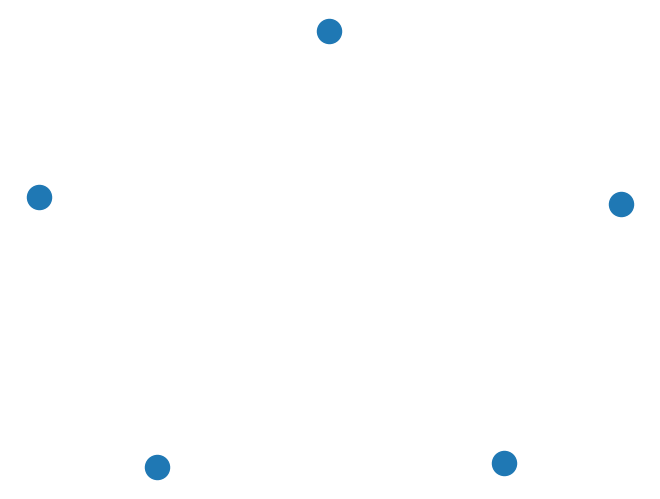

In [10]:
G.add_nodes_from([(4, {'color': 'red'}), (5, {'color': 'green'})])
nx.draw(G)

Node attributes are discussed further below.

Nodes from one graph can be incorporated into another:

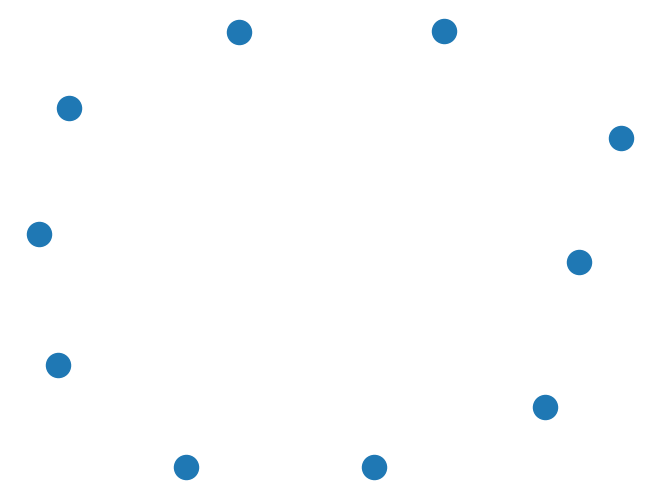

In [11]:
H = nx.path_graph(10)
G.add_nodes_from(H)
nx.draw(G)

`G` now contains the nodes of `H` as nodes of `G`. In contrast, you could use the graph `H` as a node in `G`.

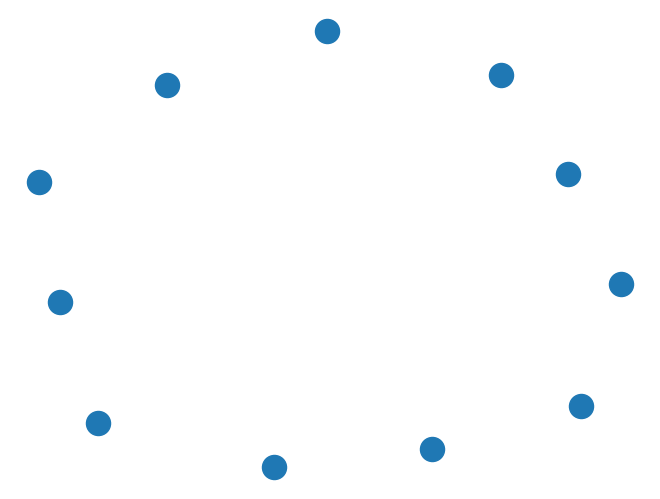

In [12]:
G.add_node(H)
nx.draw(G)

The graph `G` now contains `H` as a node. This flexibility is very powerful as it allows graphs of graphs, graphs of files, graphs o functions and much more. It is worth thinking about how to structure your application so that the nodes are useful entities. Of course you can always use a unique identifier in `G` and have a separate dictionary keyed by identifier to the node information if you prefer.

> Note: You should not change the node object if the hash depends on its contents.

---

## Edges

`G` can also be grown by adding one edge at a time.

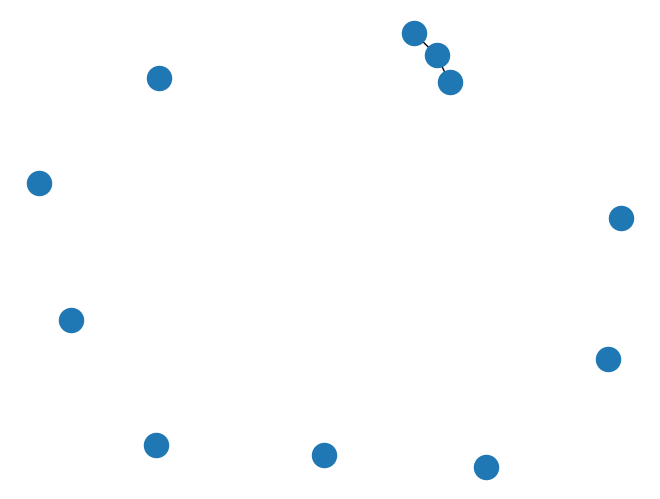

In [13]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e) # unpack edge tuple*
nx.draw(G)

by adding a list of edges,

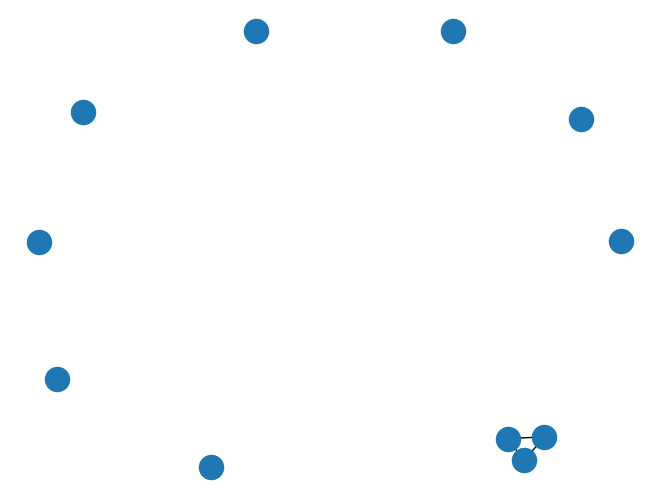

In [14]:
G.add_edges_from([(1, 2), (1, 3)])
nx.draw(G)

or by adding any `ebunch` of edges. An *ebunch* is any iterable container of edge-tuples. An edge-tuple can be a 2-tuple of nodes or a 3-tuple with 2 nodes followed by an edge attribute dictionary, e.g., `(2, 3, {'weight': 3.1415})`. Edge attributes are discussed further below.

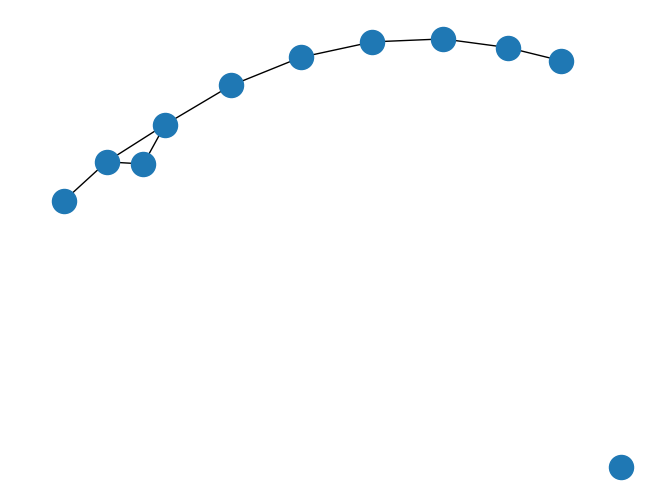

In [16]:
G.add_edges_from(H.edges)
nx.draw(G)

There are no complaints when adding existing nodes or edges. For example, after removing all nodes and edges,

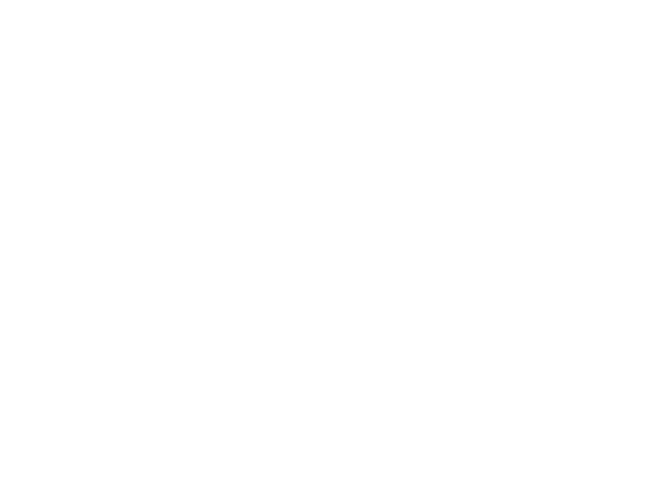

In [17]:
G.clear()
nx.draw(G)

we add new nodes/edges and NetworkX quietly ignores any that are already present.

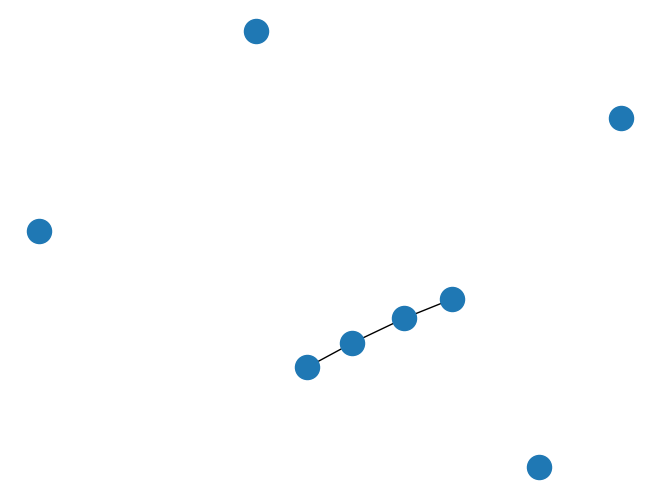

In [19]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")                      # adds node "spam"
G.add_nodes_from("spam")                # adds 4 notes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')
nx.draw(G)

At this stage the graph `G` consists of 8 nodes and 3 edges, as can be seen by:

In [20]:
G.number_of_nodes()

8

In [21]:
G.number_of_edges()

3

> The order of adjacency reporting (e.g., `G.adj`, `G.successors`, `G.predecessors`) is the order of edge addition. However the order of `G.edges` is the order of the adjacencies which includes both the order of the nodes and each node's adjacencies. See example below:

In [22]:
DG = nx.DiGraph()
DG.add_edge(2, 1)
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

---

## Examining elements of a graph

We can examine the nodes and edges. Four basic graph properties facilitate reporting: `G.nodes`, `G.edges`, `G.adj` and `G.degree`. These are set-like views of the nodes, edges, neighbors (adjacencies), and degrees of nodes in a graph. They offer a continually updated read-only view into the graph structure. They are also dict-like in that you can look up node and edge data attributes via the views and iterate with data attributes usuing methods `.items()`, `.data()`. If you want a specific container type instea of a view, you can specify one. Here we use lists, though sets, dicts, tuples, and other containers may be better in other contexts.

In [23]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [24]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [25]:
list(G.adj[1]) # or list(G.neighbors(1))

[2, 3]

In [26]:
G.degree[1] # the number of edges incident to 1

2

One can specify to report the edges and degree from a subset of all nodes using an `nbunch`. An *nbunch* is any of: `None` (meaning all nodes), a node, or an iterable container of nodes that is not itself a node in the graph.

In [27]:
G.edges([2, 'm'])

EdgeDataView([(2, 1), ('m', 3)])

In [28]:
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

---

## Removing elements from a graph

One can remove nodes and edges from the graph in a similar fashion to adding. Use methods `Graph.remove_node()`, `Graph.remove_nodes_from()`, `Graph.remove_edge()`, and `Graph.remove_edges_from()`, e.g.

In [ ]:
G.remove_node(2)
G.remove_nodes_from("spam")
print(list(G.nodes))
nx.draw(G)

NetworkXError: The node 2 is not in the graph.

[1, 3, 'spam']


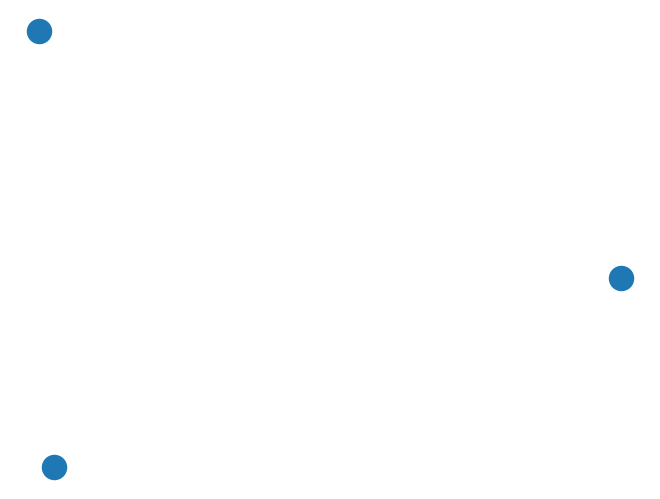

In [31]:
G.remove_edge(1, 3)
print(list(G))
nx.draw(G)

---

## Using the graph constructors

Graph objects do not have to be built up incrementally - data specifying graph structure can be passed directly to the constructors of the various graph classes. When creating a graph stucture by instantiating one og the graph classes, you can specify data in several formats.

[(1, 2), (2, 1)]


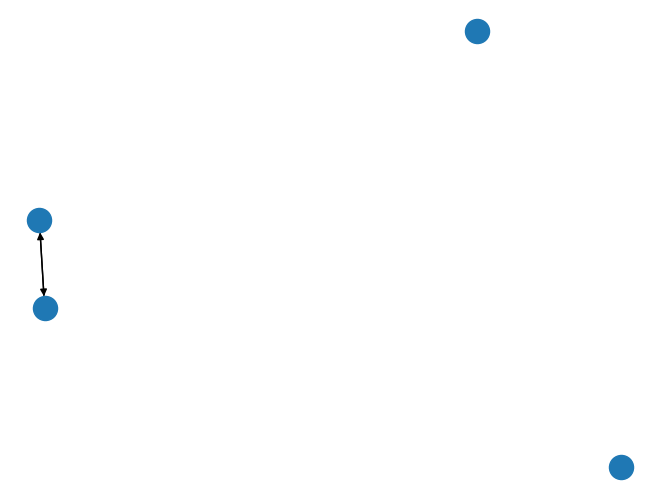

In [32]:
G.add_edge(1, 2)
H = nx.DiGraph(G) # Create a DiGraph using the connections from G
print(list(H.edges()))
nx.draw(H)

[(0, 1), (1, 2), (2, 3)]


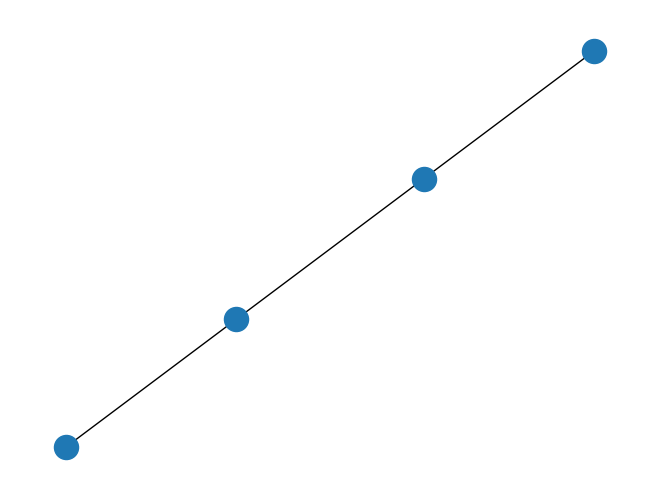

In [33]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist) # Create a graph from an edge list
print(list(H.edges()))
nx.draw(H)

[(0, 1), (0, 2), (1, 2)]


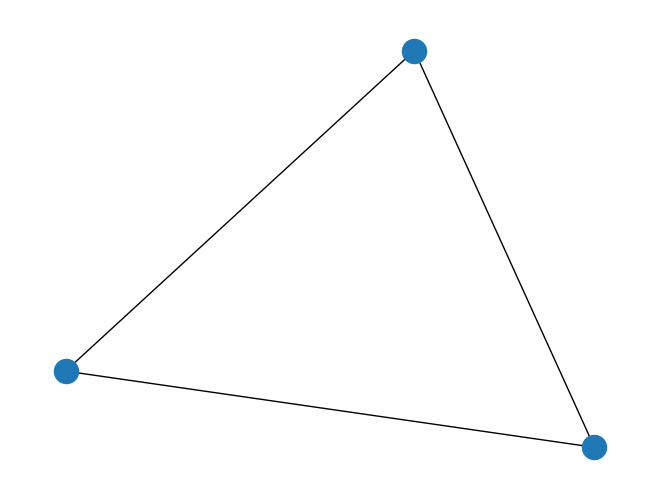

In [34]:
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict) # create a Graph dict mapping nodes to nbrs
print(list(H.edges()))
nx.draw(H)

---

## What to use as nodes and edges

**This section next**

---

# Plotting Network Graphs

- https://pyvis.readthedocs.io/en/latest/
- https://plotly.com/python/network-graphs/